In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl

# Read CSV file into a pandas DataFrame
file_path = "US State.csv"
df = pd.read_csv(file_path, parse_dates=['Year'])

# Filter out rows with Geography Type other than 'State'
df_states = df[df['Geography Type'] == 'State']

# Convert 'Resident Population' column to numeric after removing commas
df_states['Resident Population'] = df_states['Resident Population'].replace({',': ''}, regex=True).astype(float)

# Set the 'Year' column as the index
df_states.set_index('Year', inplace=True)

# Group by 'Name' (State) and sum the 'Resident Population' for each year
grouped_data = df_states.groupby(['Name', pd.Grouper(freq='Y')])['Resident Population'].sum().unstack('Name')

/var/folders/0j/9zdd5kts0_x1d_dl7qmyj9k80000gn/T/ipykernel_15665/4022763085.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_states['Resident Population'] = df_states['Resident Population'].replace({',': ''}, regex=True).astype(float)


In [2]:
top_states = grouped_data.sum().nlargest(10).index
other_states = grouped_data.drop(columns=top_states)
top_10_states = grouped_data[top_states]
other_states['Other States'] = other_states.mean(axis=1)

<Figure size 2000x3000 with 0 Axes>

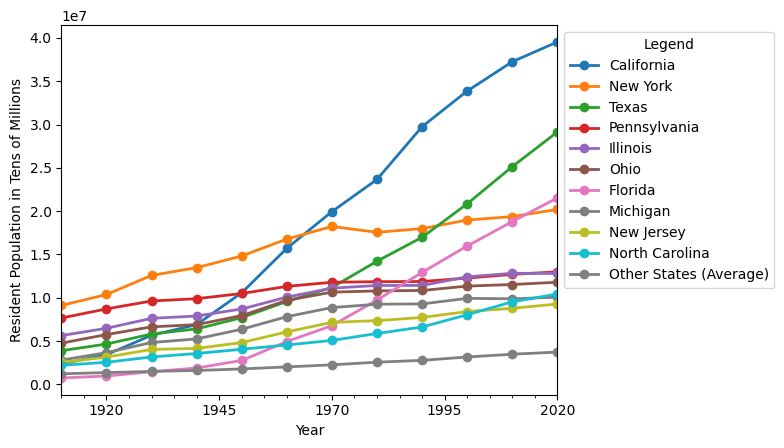

In [3]:
# Plot the time series line graph
plt.figure(figsize=(20, 30))
top_10_states.plot.line(marker='o', linestyle='-', linewidth=2)
other_states['Other States'].plot.line(marker='o', linestyle='-', linewidth=2, color='gray', label='Other States (Average)')
#plt.title('US State Populations Over Time')
plt.xlabel('Year')
plt.ylabel('Resident Population in Tens of Millions')
plt.legend(title='Legend', bbox_to_anchor=(1, 1))
plt.show()

In [4]:
decades = range(1910, 2030, 10)
shapefile_path = "States_shapefile.shp"
gdf_states = gpd.read_file(shapefile_path)
grouped_data = grouped_data.reset_index()
decade_data_reshaped = pd.melt(grouped_data, id_vars=['Year'], var_name='Name', value_name='Resident Population')
gdf_states['State_Name'] = gdf_states['State_Name'].str.title()
vmin = min(decade_data_reshaped[decade_data_reshaped['Year'].dt.year == 2020]['Resident Population'])
vmax = max(decade_data_reshaped[decade_data_reshaped['Year'].dt.year == 2020]['Resident Population'])
mynorm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

Top 5 States (1910s):
New York: 9,113,614.0
Pennsylvania: 7,665,111.0
Illinois: 5,638,591.0
Ohio: 4,767,121.0
Texas: 3,896,542.0


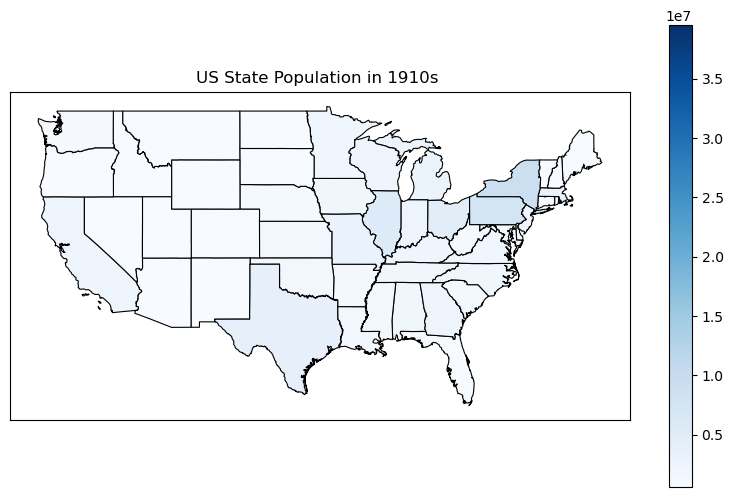

Top 5 States (1920s):
New York: 10,385,227.0
Pennsylvania: 8,720,017.0
Illinois: 6,485,280.0
Ohio: 5,759,394.0
Texas: 4,663,228.0


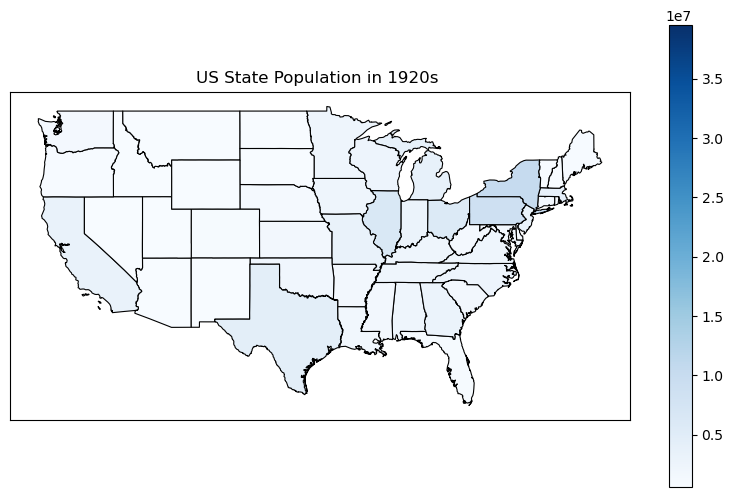

Top 5 States (1930s):
New York: 12,588,066.0
Pennsylvania: 9,631,350.0
Illinois: 7,630,654.0
Ohio: 6,646,697.0
Texas: 5,824,715.0


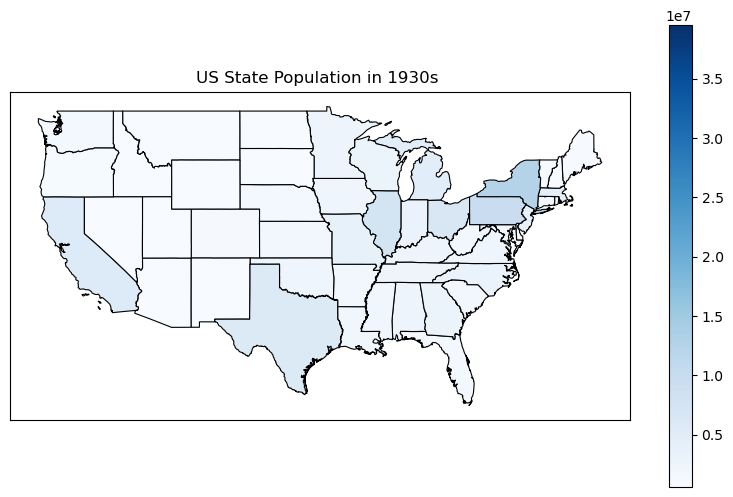

Top 5 States (1940s):
New York: 13,479,142.0
Pennsylvania: 9,900,180.0
Illinois: 7,897,241.0
Ohio: 6,907,612.0
California: 6,907,387.0


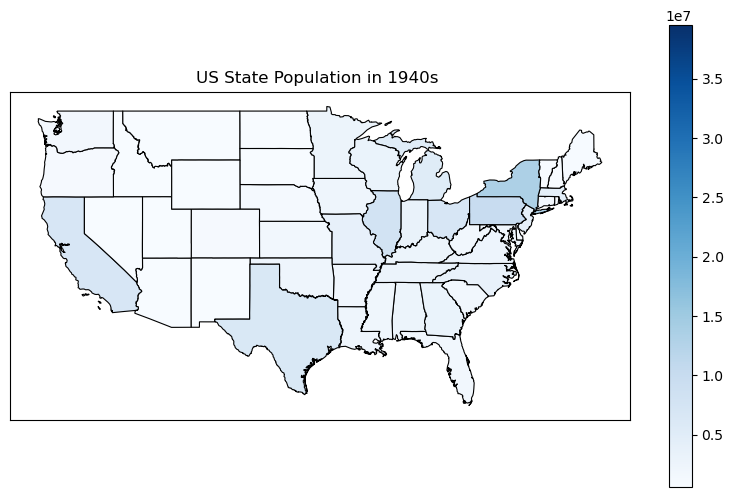

Top 5 States (1950s):
New York: 14,830,192.0
California: 10,586,223.0
Pennsylvania: 10,498,012.0
Illinois: 8,712,176.0
Ohio: 7,946,627.0


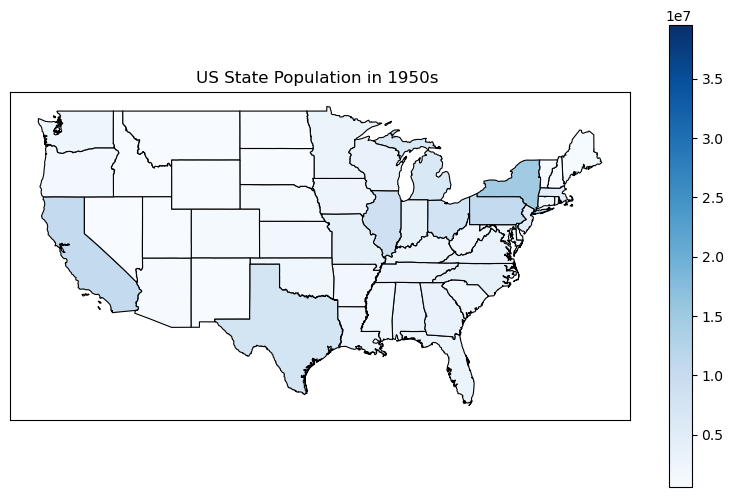

Top 5 States (1960s):
New York: 16,782,304.0
California: 15,717,204.0
Pennsylvania: 11,319,366.0
Illinois: 10,081,158.0
Ohio: 9,706,397.0


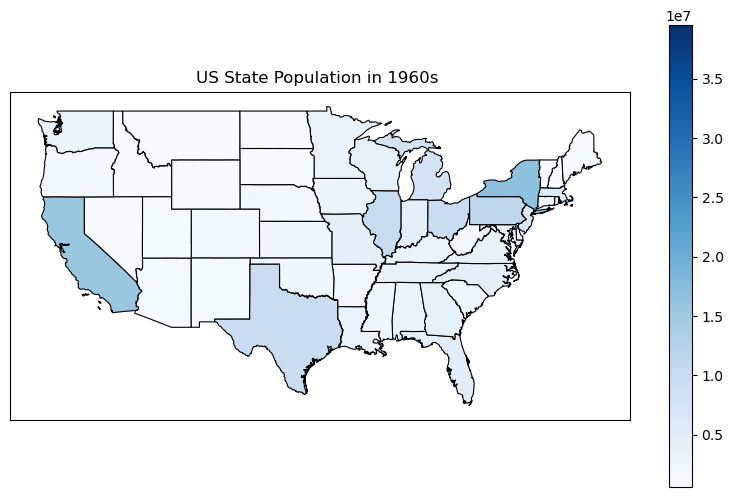

Top 5 States (1970s):
California: 19,953,134.0
New York: 18,236,967.0
Pennsylvania: 11,793,909.0
Texas: 11,196,730.0
Illinois: 11,113,976.0


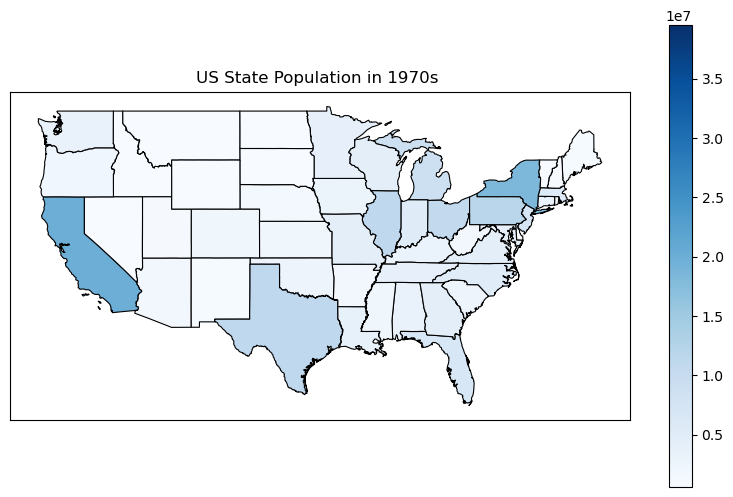

Top 5 States (1980s):
California: 23,667,902.0
New York: 17,558,072.0
Texas: 14,229,191.0
Pennsylvania: 11,863,895.0
Illinois: 11,426,518.0


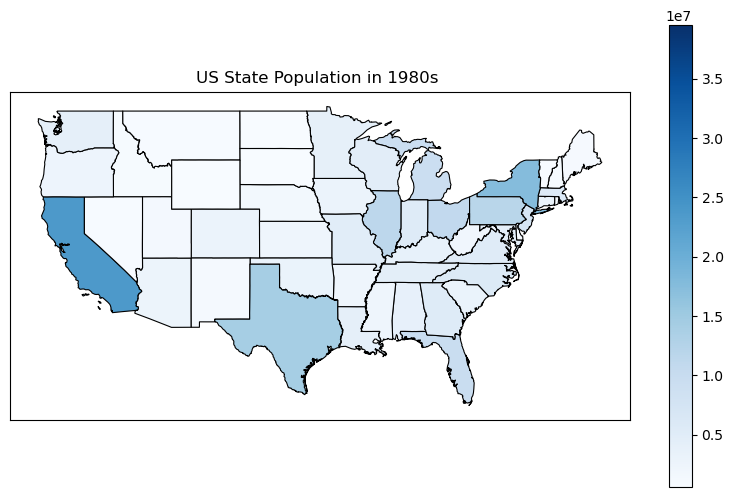

Top 5 States (1990s):
California: 29,760,021.0
New York: 17,990,455.0
Texas: 16,986,510.0
Florida: 12,937,926.0
Pennsylvania: 11,881,643.0


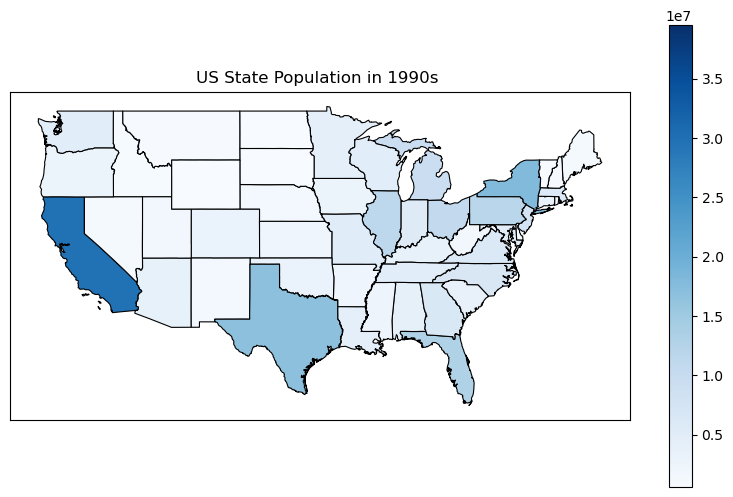

Top 5 States (2000s):
California: 33,871,648.0
Texas: 20,851,820.0
New York: 18,976,457.0
Florida: 15,982,378.0
Illinois: 12,419,293.0


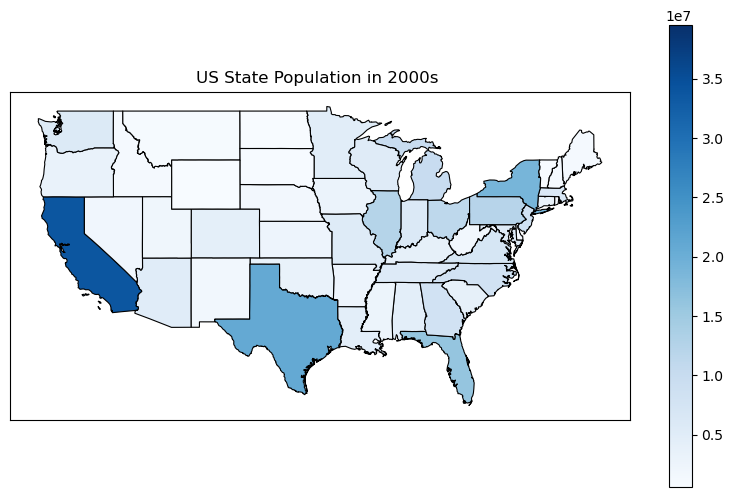

Top 5 States (2010s):
California: 37,253,956.0
Texas: 25,145,561.0
New York: 19,378,102.0
Florida: 18,801,310.0
Illinois: 12,830,632.0


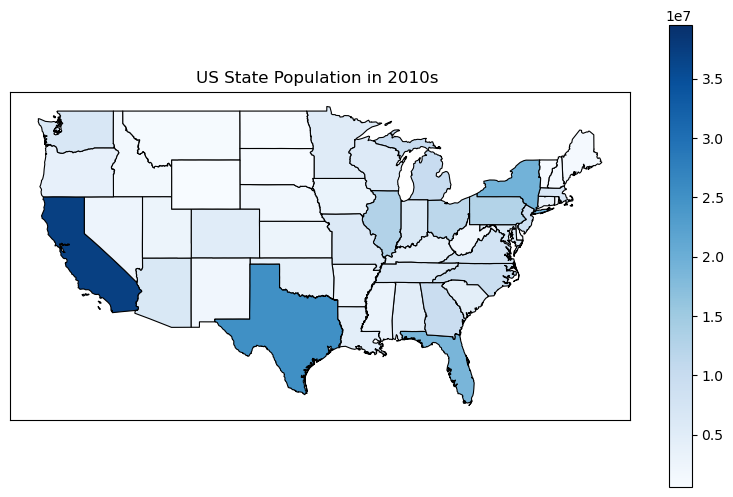

Top 5 States (2020s):
California: 39,538,223.0
Texas: 29,145,505.0
Florida: 21,538,187.0
New York: 20,201,249.0
Pennsylvania: 13,002,700.0


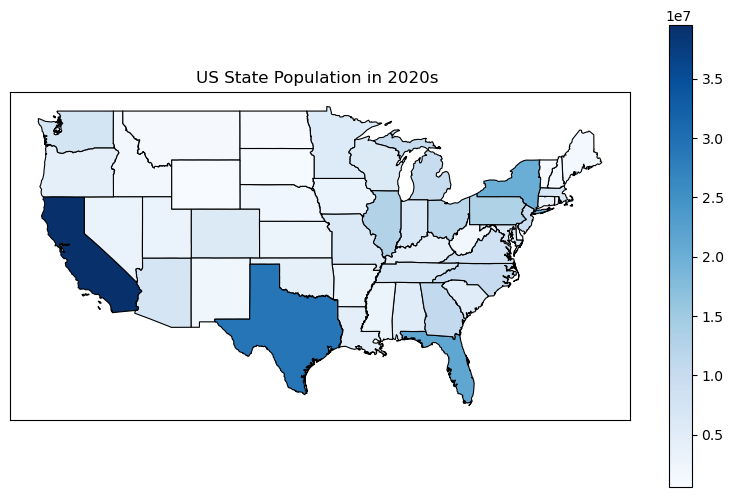

In [5]:
for decade in decades:
    decade_data = decade_data_reshaped[decade_data_reshaped['Year'].dt.year == decade]
    
    # Merge the shapefile data with the population data
    merged_data = gdf_states.merge(decade_data, left_on='State_Name', right_on='Name')
    exclude_states = ['Alaska', 'Hawaii']
    merged_data = merged_data[~merged_data['Name'].isin(exclude_states)]
    
    top_5_counties = merged_data.sort_values(by='Resident Population', ascending=False).head(5)
    print(f'Top 5 States ({decade}s):')
    for idx, (county, population) in top_5_counties[['State_Name', 'Resident Population']].iterrows():
        print(f'{county.title()}: {population:,}')
    
    # Plot the data
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    merged_data.plot(column='Resident Population', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='black', legend=True, norm = mynorm)
    ax.set_title(f'US State Population in {decade}s ')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [6]:
merged_data = gdf_states.merge(decade_data_reshaped, left_on='State_Name', right_on='Name')
df = merged_data

In [7]:
# Calculate the slope for each state
slope_df = df.pivot(index='State_Name', columns='Year', values='Resident Population')
slope_df['slope'] = (slope_df['2020-12-31'] - slope_df['1910-12-31']) / 110

# Merge the slope values back to the original DataFrame
df = pd.merge(df, slope_df['slope'], on='State_Name', how='left')

unique_states_slopes = slope_df[['slope']].reset_index()
unique_states_slopes.sort_values(by='slope', ascending=False).head(5)

Year,State_Name,slope
4,California,337824.309091
42,Texas,229536.027273
8,Florida,188959.709091
31,New York,100796.681818
32,North Carolina,74846.372727
